In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pypl
import plotly.express as px  

In [2]:
finale_df = pd.read_csv('Final.csv')

In [3]:
finale_df.head()

,number,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,rank,decade
0,11602,Waiting At The Bus Stop,Bobby Sherman,0.496,0.769,9,-10.992,1,0.0767,0.8790,0.000488,0.6830,0.910,161.919,121938,4,0,70
1,15547,It Feels So Good To Be Loved So Bad,The Manhattans,0.537,0.590,0,-8.613,0,0.0382,0.3920,0.000000,0.1010,0.430,77.954,278947,4,0,70
2,15548,One Night Affair,Jerry Butler,0.454,0.864,5,-6.508,0,0.0888,0.3190,0.000000,0.3380,0.750,118.656,208533,4,0,70
3,15550,Little Bit Of Soap,Nigel Olsson,0.831,0.523,4,-12.147,1,0.0491,0.0630,0.000088,0.0849,0.969,116.815,206933,4,0,70
4,15551,Free,Chicago,0.465,0.863,5,-7.887,0,0.0472,0.0528,0.843000,0.2080,0.920,176.198,74766,3,0,70


***
And finally, we will change those pesky milliseconds into minutes and seconds and rename to: 'min:sec'
***

In [32]:
def ms_to_min_sec(ms):
    sec = ms/1000
    return f"{int(sec//60)}:{int(sec%60)}"

finale_df['min_sec'] = finale_df['duration_ms'].apply(ms_to_min_sec)
finale_df.head()


,number,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,rank,decade,min_sec
0,11602,Waiting At The Bus Stop,Bobby Sherman,0.496,0.769,9,-10.992,1,0.0767,0.8790,0.000488,0.6830,0.910,161.919,121938,4,0,70,2:1
1,15547,It Feels So Good To Be Loved So Bad,The Manhattans,0.537,0.590,0,-8.613,0,0.0382,0.3920,0.000000,0.1010,0.430,77.954,278947,4,0,70,4:38
2,15548,One Night Affair,Jerry Butler,0.454,0.864,5,-6.508,0,0.0888,0.3190,0.000000,0.3380,0.750,118.656,208533,4,0,70,3:28
3,15550,Little Bit Of Soap,Nigel Olsson,0.831,0.523,4,-12.147,1,0.0491,0.0630,0.000088,0.0849,0.969,116.815,206933,4,0,70,3:26
4,15551,Free,Chicago,0.465,0.863,5,-7.887,0,0.0472,0.0528,0.843000,0.2080,0.920,176.198,74766,3,0,70,1:14


In [5]:
finale_df2 = finale_df.drop(['duration_ms'], axis=1)
#finale_df2.head()
finale_df2

,number,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,rank,decade,min_sec
0,11602,Waiting At The Bus Stop,Bobby Sherman,0.496,0.769,9,-10.992,1,0.0767,0.8790,0.000488,0.6830,0.910,161.919,4,0,70,2:1
1,15547,It Feels So Good To Be Loved So Bad,The Manhattans,0.537,0.590,0,-8.613,0,0.0382,0.3920,0.000000,0.1010,0.430,77.954,4,0,70,4:38
2,15548,One Night Affair,Jerry Butler,0.454,0.864,5,-6.508,0,0.0888,0.3190,0.000000,0.3380,0.750,118.656,4,0,70,3:28
3,15550,Little Bit Of Soap,Nigel Olsson,0.831,0.523,4,-12.147,1,0.0491,0.0630,0.000088,0.0849,0.969,116.815,4,0,70,3:26
4,15551,Free,Chicago,0.465,0.863,5,-7.887,0,0.0472,0.0528,0.843000,0.2080,0.920,176.198,3,0,70,1:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11653,15312,The Way We Were,Barbra Streisand,0.264,0.320,9,-11.716,1,0.0325,0.8850,0.001410,0.1340,0.171,138.108,3,18,70,3:31
11654,21207,"Say You, Say Me",Lionel Richie,0.636,0.405,8,-11.113,1,0.0287,0.3550,0.000000,0.0804,0.257,128.068,4,19,80,4:1
11655,11853,I Will Survive,Gloria Gaynor,0.777,0.725,0,-8.681,1,0.0500,0.0131,0.008050,0.2460,0.529,116.670,4,20,70,3:18
11656,2185,Big Bad John,Jimmy Dean,0.516,0.457,8,-12.609,1,0.1840,0.5960,0.000000,0.1060,0.455,173.934,4,20,60,3:2


In [6]:
finale_df2.rename(columns={'min_sec': 'min:sec'}, inplace=True)

In [7]:
finale_df2.info()
finale_df2.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11658 entries, 0 to 11657
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            11658 non-null  int64  
 1   track             11658 non-null  object 
 2   artist            11658 non-null  object 
 3   danceability      11658 non-null  float64
 4   energy            11658 non-null  float64
 5   key               11658 non-null  int64  
 6   loudness          11658 non-null  float64
 7   mode              11658 non-null  int64  
 8   speechiness       11658 non-null  float64
 9   acousticness      11658 non-null  float64
 10  instrumentalness  11658 non-null  float64
 11  liveness          11658 non-null  float64
 12  valence           11658 non-null  float64
 13  tempo             11658 non-null  float64
 14  time_signature    11658 non-null  int64  
 15  rank              11658 non-null  int64  
 16  decade            11658 non-null  int64 

,number,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,rank,decade,min:sec
11653,15312,The Way We Were,Barbra Streisand,0.264,0.320,9,-11.716,1,0.0325,0.8850,0.00141,0.1340,0.171,138.108,3,18,70,3:31
11654,21207,"Say You, Say Me",Lionel Richie,0.636,0.405,8,-11.113,1,0.0287,0.3550,0.00000,0.0804,0.257,128.068,4,19,80,4:1
11655,11853,I Will Survive,Gloria Gaynor,0.777,0.725,0,-8.681,1,0.0500,0.0131,0.00805,0.2460,0.529,116.670,4,20,70,3:18
11656,2185,Big Bad John,Jimmy Dean,0.516,0.457,8,-12.609,1,0.1840,0.5960,0.00000,0.1060,0.455,173.934,4,20,60,3:2
11657,18883,All Night Long (All Night),Lionel Richie,0.739,0.576,1,-12.024,1,0.0472,0.1220,0.00206,0.0482,0.780,108.810,4,20,80,4:20


***

Next, let's take a look at the top ten 'chartable' artists ranked by how many of their tracks appear in the data. This would probably be a good place to start when considering which artists to cover *(sing one of their songs)* in a setlist.


***

In [8]:
top_ten_artists = finale_df2.groupby("artist").count().sort_values(by="track", ascending=False)["track"][:10]
top_ten_artists.head(10)

artist
The Beatles           56
Stevie Wonder         51
Neil Diamond          50
The Beach Boys        49
The Rolling Stones    48
Aretha Franklin       48
Dionne Warwick        46
The Temptations       46
Elton John            41
Chicago               39
Name: track, dtype: int64

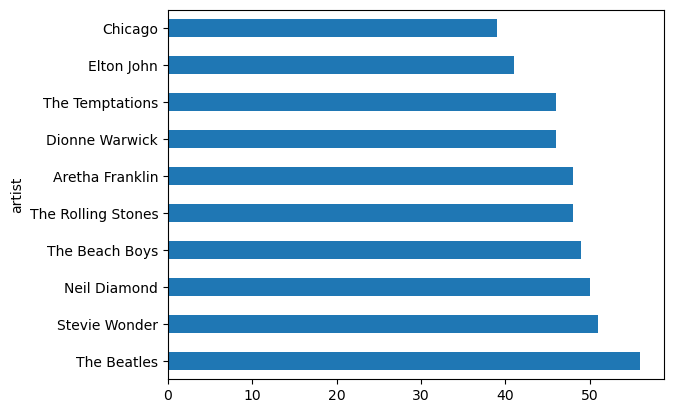

In [9]:
top_ten_artists.plot.barh()
plt.show()

***

As I'm sure most everyone is, I'm extremely familiar with all of these artists. You'd definitely be hardpressed to find a setlist that didn't at least contain one song by The Rolling Stones, Neil Diamond, The Beach Boys or Beatles.

Next, I would like to look at how the songs in our list were written. What key are they written in? Are they considered to be written in a major or minor key?
We will create a dataframe to organize tracks per key and mode.

***

`Steps: Creating a dataframe to organize songs per key and mode, renaming columns 0 to minor and 1 to major, organizing key names, creating a column containing the total number of songs`

In [10]:
# Creating a dataframe to organize songs per key and mode
key_mode = finale_df2.groupby(['key','mode']).size().unstack(fill_value = 0).reset_index()
# Renaming columns 0 to minor and 1 to major
key_mode.rename(columns = {0: 'minor', 1: 'major'}, inplace = True)
# Organizing key names
key_mode.key.replace({0:'C',
1:'C♯/D♭',
2:'D',
3:'E♭/D♯',
4:'E',
5:'F',
6:'F♯/G♭',
7:'G',
8:'A♭/G♯',
9:'A',
10:'B♭/A♯',
11:'B'}, inplace=True)
# Creating a column containing the total number of songs
key_mode['tracks'] = key_mode['minor'] + key_mode['major']

# Creating a column containing the total number of songs
key_mode

mode,key,minor,major,tracks
0,C,187,1438,1625
1,C♯/D♭,206,549,755
2,D,188,1158,1346
3,E♭/D♯,72,346,418
4,E,300,650,950
5,F,267,866,1133
6,F♯/G♭,178,300,478
7,G,230,1211,1441
8,A♭/G♯,82,501,583
9,A,349,1022,1371


In [11]:
key_mode.sum()

mode
key       CC♯/D♭DE♭/D♯EFF♯/G♭GA♭/G♯AB♭/A♯B
minor                                 2620
major                                 9038
tracks                               11658
dtype: object

In [12]:
key_mode['Result'] = key_mode['minor'] / key_mode['tracks'] * 100
print(key_mode)

mode    key  minor  major  tracks     Result
0         C    187   1438    1625  11.507692
1     C♯/D♭    206    549     755  27.284768
2         D    188   1158    1346  13.967311
3     E♭/D♯     72    346     418  17.224880
4         E    300    650     950  31.578947
5         F    267    866    1133  23.565755
6     F♯/G♭    178    300     478  37.238494
7         G    230   1211    1441  15.961138
8     A♭/G♯     82    501     583  14.065180
9         A    349   1022    1371  25.455872
10    B♭/A♯    211    633     844  25.000000
11        B    350    364     714  49.019608


***
In the first table we notice that the majority of songs are written in **C and G**. This is not surprising. On a piano new students learn to find **C** first. With guitars, the first chord you almost always learn is **G**... and from these 'root notes' or 'chords' you begin playing or composing your song. So this all 'tracks'. As we can see here, about 11.5 percent of songs in the key of **C** are written in minor. Conversely, almost 50 percent of songs written in the key of **B** are minor.

While this is all interesting, the most important take away is that about 77.5 percent of songs (9038) are written in major. This is good info for our setlist. It tells us either this is what is found most appealing or at least, this is what our audience is conditioned to hearing. The key the song is written in is irrelant to expert guitar players because they know their musical scales. For beginning or intermediate players, there is a device called a 'capo' that you clip on your guitar and can slide up and down the 'neck' to change keys for you. 

OK, now let's do a 'liveness' sort...
***

In [13]:
top_twenty_liveness_tracks_df = finale_df2[["liveness", "track", "artist", "decade", "rank"]].sort_values(by="liveness", ascending=False)[:20]
top_twenty_liveness_tracks_df

,liveness,track,artist,decade,rank
2087,0.999,Life Is A Carnival,The Band,70,0
4334,0.997,Encore,Cheryl Lynn,80,0
4744,0.993,Ain't Nobody,Chaka Khan,80,0
3411,0.990,I Can't Let Go,Linda Ronstadt,80,0
1290,0.989,Live Is Life,Opus,80,0
712,0.989,Magical Mystery Tour,Ambrosia,70,0
9854,0.988,You'll Never Get To Heaven (If You Break My He...,The Stylistics,70,0
2190,0.988,Rockin' All Over The World,John Fogerty,70,0
1446,0.987,Living In A Dream,Pseudo Echo,80,0
11399,0.984,"Since I Met You, Baby",Sonny James,60,0


**Okay, cool beans...** even though none of these songs are considered 'Top 20' of their decade, there are some pretty good songs on here to cover. Lets cut the data some other ways and see what we can find.

I'd like to look at some properties of the songs through the decades. What has changed? What has stayed the same? The things that come to mind as a singer/guitar player would be: acousticness, energym mode, liveness and valence.

Text(0.5, 0, 'DECADE')

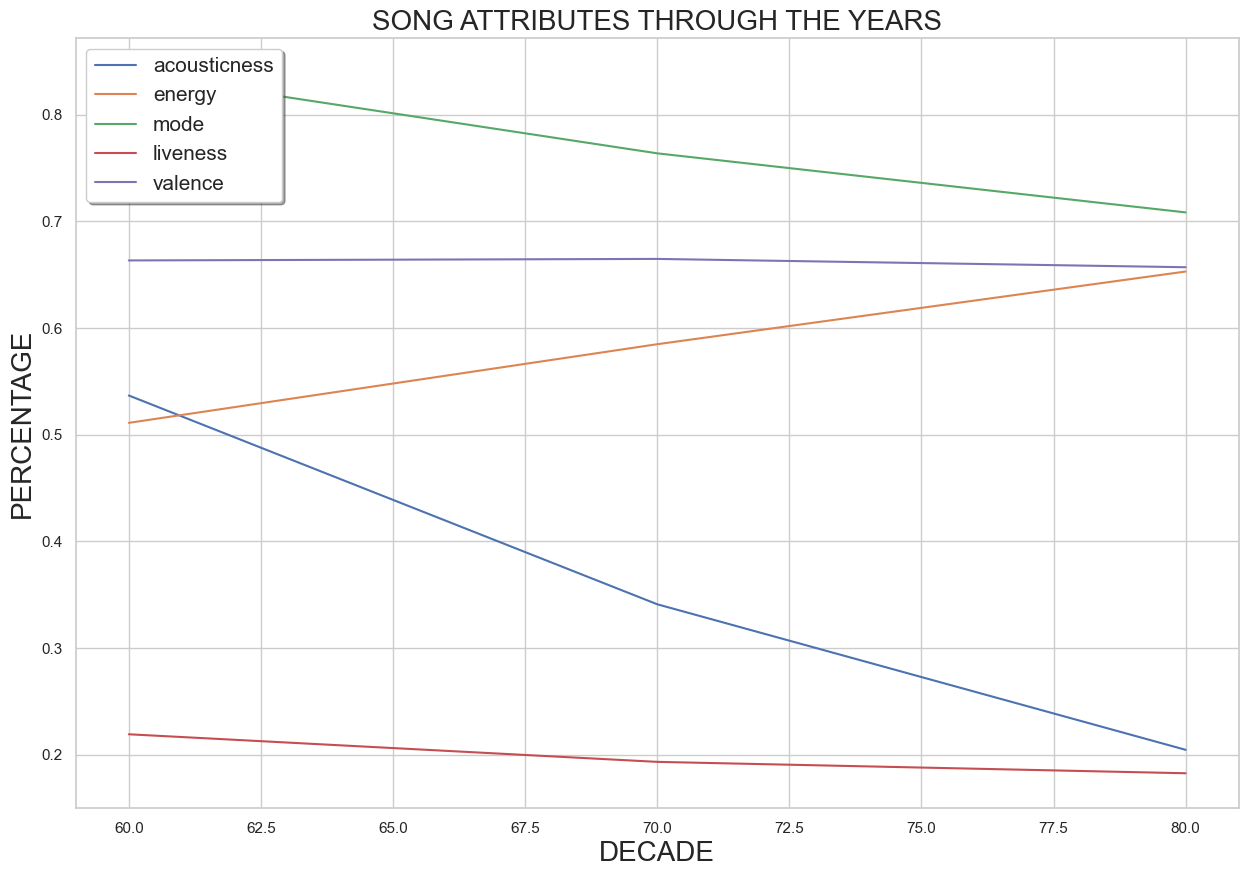

In [33]:
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
target_cols = ["acousticness","energy","mode","liveness","valence"]
for c in target_cols:
    # group the data by year, and plot the mean score of all music in that year
    x = finale_df2.groupby("decade")[c].mean()
    ax= sns.lineplot(x=x.index,y=x,label=c)

ax.set_title('SONG ATTRIBUTES THROUGH THE YEARS', fontsize = 20)
ax.legend(fancybox=True, framealpha=1, shadow=True, prop={'size': 15}, loc = 'upper left')
ax.set_ylabel('PERCENTAGE', fontsize = 20)
ax.set_xlabel('DECADE', fontsize = 20)

***
Here we can see that as things moved from the 60s to the 80s, 'acousticness' and 'mode' had significant drops while 'energy' rose. These findings are consistent with what we would expect. The songs of the 80s began introducing synthesizers and different types of electronic effect pedals for instruments and voice. This would definitely veer from 'acousticness' and provide more 'energy'. I think its fair to also say that as music moved away from the late 50s/early 60s of 'rock and roll' we start to get away from those 3 and 4 chord song templates and start delving further into creativeness. This would explain the 'mode' change or wanting to explore things in minor keys, and a mixture of the two. The steadiness of the valence seems to indicate that through these thirty years, listeners and the industry still enjoy a little more positivenss in their music but aren't afraid to explore darker areas. 'Liveness', or audience presence, is also fairly consistent but its sublte drop as it heads towards the 80s would make sense with the drop in 'acousticness'.

Next, let's explore 'valence' and 'liveness'.
***

In [15]:
top_twenty_valence_tracks = finale_df2[["liveness", "track", "artist", "decade", "rank", "valence", "min:sec"]].sort_values(by="valence", ascending=False)[:20]
top_twenty_valence_tracks

,liveness,track,artist,decade,rank,valence,min:sec
8588,0.0641,I'm Gonna Knock On Your Door,Eddie Hodges,60,0,0.991,2:6
1651,0.0572,Low Rider,War,70,0,0.990,3:11
2552,0.0788,Hideaway,John Sebastian,70,0,0.988,2:55
9729,0.1060,Hang On Sloopy,Rick Derringer,70,0,0.986,3:6
127,0.0490,What A Fool Believes,The Doobie Brothers,70,0,0.985,3:43
5594,0.2830,Rebels Are We,Chic,80,0,0.984,4:55
3915,0.0938,She Works Hard For The Money,Donna Summer,80,0,0.984,5:20
6161,0.2050,Comin' On,Bill Black's Combo,60,0,0.983,2:10
4633,0.2050,Out Of Work,Gary U.S. Bonds,80,0,0.983,2:54
7491,0.3300,Hippy Hippy Shake,The Swinging Blue Jeans,60,0,0.982,1:46


In [16]:
top_twenty_setlist_tracks = finale_df2[["liveness", "track", "artist", "decade", "rank", "valence","min:sec"]].sort_values(by="liveness", ascending=False)[:20]
top_twenty_setlist_tracks

,liveness,track,artist,decade,rank,valence,min:sec
2087,0.999,Life Is A Carnival,The Band,70,0,0.585,4:25
4334,0.997,Encore,Cheryl Lynn,80,0,0.880,5:19
4744,0.993,Ain't Nobody,Chaka Khan,80,0,0.463,5:19
3411,0.990,I Can't Let Go,Linda Ronstadt,80,0,0.323,3:3
1290,0.989,Live Is Life,Opus,80,0,0.765,4:9
712,0.989,Magical Mystery Tour,Ambrosia,70,0,0.346,3:52
9854,0.988,You'll Never Get To Heaven (If You Break My He...,The Stylistics,70,0,0.565,2:7
2190,0.988,Rockin' All Over The World,John Fogerty,70,0,0.818,2:55
1446,0.987,Living In A Dream,Pseudo Echo,80,0,0.775,3:35
11399,0.984,"Since I Met You, Baby",Sonny James,60,0,0.554,2:52


***
OK, still not hitting ranked songs, but again, some good ones to pull from. Next, lets check on the top ten artists with the most ranked songs. These will be indicative of how many Top 20 songs they had in each decade and combining the totals.
***

In [17]:
top_artists_df = finale_df2.query('rank >= 1').groupby('artist')['rank'].nunique().sort_values(ascending=False)
top_artists_df.head()

artist
Bee Gees         3
Andy Gibb        2
Lionel Richie    2
The Beatles      2
Marvin Gaye      2
Name: rank, dtype: int64

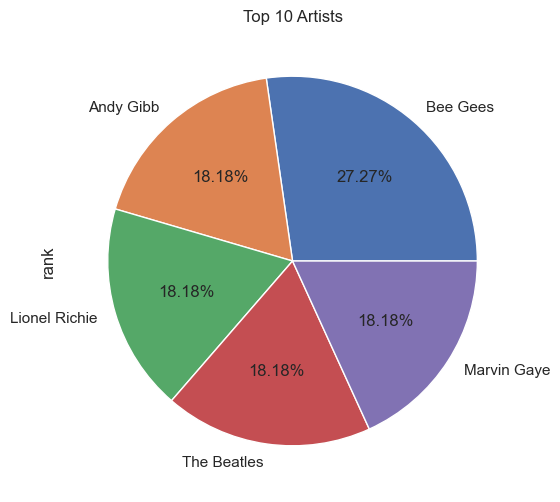

In [34]:
plt.figure(figsize=(12, 7))
top_artists_df.head().plot(kind='pie', autopct='%1.2f%%', figsize=(6, 6), title="Top 10 Artists")
plt.show()

***
I'm extremely familiar with all of these artists. Again, you'd be hardpressed to find a setlist that didn't at least contain one song by the Bee Gees, Marvin Gaye or the Beatles. The Bee Gees and their fun songs dominated the disco 70s and the talent of the Beatles is still being felt today with new releases (i.e., 'Now and Then'). Side Note: Although, the Bee Gees did backup and help their younger brother Andy a time or two, both of his 'Top 20 songs' did not include them on accompanying vocals.

Next, I'd like to look at some cross cuts of data.
***

In [19]:
finale_df3=finale_df2.groupby('danceability')['valence'].mean().sort_values(ascending=[False]).reset_index()
finale_df3.head()

,danceability,valence
0,0.960,0.9840
1,0.918,0.9695
2,0.940,0.9690
3,0.966,0.9670
4,0.897,0.9660


In [35]:
import plotly.express as px   
#importing plotly
fig2 = px.scatter(finale_df3, x="valence", y="danceability", color="danceability",size='valence')
fig2.show()

# COWABUNGA!
***
We have plotted a scatter plot where the areas of the circles corresponds to the 'valence' score. As a reminder, 'valence' describes the musical positiveness conveyed by a track. Here we can see that as the positiveness of a song increases so does its 'danceability'.

Finally, what I feel I'm after is a sort of 'rank', with variables of 'valence', 'acousticness', 'liveness', 'danceability', 'energy', 'track' and 'artist'. 
***

In [21]:
perfect_setlist_df = finale_df2[["track", "artist", "decade", "rank", "valence", "acousticness", "liveness", "danceability", "min:sec"]].sort_values(by="rank", ascending=False)[:40]
perfect_setlist_df.head(50)


,track,artist,decade,rank,valence,acousticness,liveness,danceability,min:sec
11657,All Night Long (All Night),Lionel Richie,80,20,0.780,0.122000,0.0482,0.739,4:20
11656,Big Bad John,Jimmy Dean,60,20,0.455,0.596000,0.1060,0.516,3:2
11655,I Will Survive,Gloria Gaynor,70,20,0.529,0.013100,0.2460,0.777,3:18
11501,(Sittin' On) The Dock Of The Bay,Otis Redding,60,19,0.535,0.684000,0.0810,0.769,2:43
11654,"Say You, Say Me",Lionel Richie,80,19,0.257,0.355000,0.0804,0.636,4:1
9399,A Fifth Of Beethoven,Walter Murphy & The Big Apple Band,70,19,0.784,0.316000,0.0611,0.688,3:2
7615,Honky Tonk Women,The Rolling Stones,60,18,0.967,0.363000,0.0660,0.562,2:59
11652,Billie Jean,Michael Jackson,80,18,0.847,0.023600,0.0359,0.920,4:53
11653,The Way We Were,Barbra Streisand,70,18,0.171,0.885000,0.1340,0.264,3:31
7484,Sugar Shack,Jimmy Gilmer And The Fireballs,60,17,0.805,0.221000,0.1040,0.856,2:1


In [22]:
perfect_setlist_df2 = perfect_setlist_df[perfect_setlist_df['rank'] !=0]
perfect_setlist_df2.head(40)

,track,artist,decade,rank,valence,acousticness,liveness,danceability,min:sec
11657,All Night Long (All Night),Lionel Richie,80,20,0.780,0.122000,0.0482,0.739,4:20
11656,Big Bad John,Jimmy Dean,60,20,0.455,0.596000,0.1060,0.516,3:2
11655,I Will Survive,Gloria Gaynor,70,20,0.529,0.013100,0.2460,0.777,3:18
11501,(Sittin' On) The Dock Of The Bay,Otis Redding,60,19,0.535,0.684000,0.0810,0.769,2:43
11654,"Say You, Say Me",Lionel Richie,80,19,0.257,0.355000,0.0804,0.636,4:1
9399,A Fifth Of Beethoven,Walter Murphy & The Big Apple Band,70,19,0.784,0.316000,0.0611,0.688,3:2
7615,Honky Tonk Women,The Rolling Stones,60,18,0.967,0.363000,0.0660,0.562,2:59
11652,Billie Jean,Michael Jackson,80,18,0.847,0.023600,0.0359,0.920,4:53
11653,The Way We Were,Barbra Streisand,70,18,0.171,0.885000,0.1340,0.264,3:31
7484,Sugar Shack,Jimmy Gilmer And The Fireballs,60,17,0.805,0.221000,0.1040,0.856,2:1


In [23]:
perfect_setlist_df3 = perfect_setlist_df2[["track", "artist", "decade", "rank", "valence", "acousticness", "liveness", "danceability", "min:sec"]].sort_values(by="danceability", ascending=False)[:40]
perfect_setlist_df3.head(40)

,track,artist,decade,rank,valence,acousticness,liveness,danceability,min:sec
5630,Another One Bites The Dust,Queen,80,7,0.756,0.112000,0.1630,0.933,3:34
11652,Billie Jean,Michael Jackson,80,18,0.847,0.023600,0.0359,0.920,4:53
11650,Upside Down,Diana Ross,80,16,0.884,0.178000,0.0377,0.873,4:5
7484,Sugar Shack,Jimmy Gilmer And The Fireballs,60,17,0.805,0.221000,0.1040,0.856,2:1
11647,Hot Stuff,Donna Summer,70,12,0.966,0.005590,0.0707,0.823,5:14
11638,Every Breath You Take,The Police,80,5,0.740,0.543000,0.0714,0.820,4:13
11648,Play That Funky Music,Wild Cherry,70,14,0.933,0.043500,0.0610,0.814,5:0
4816,Abracadabra,The Steve Miller Band,80,17,0.963,0.074900,0.1560,0.791,5:8
11233,I'm A Believer,The Monkees,60,6,0.470,0.982000,0.1210,0.789,3:3
2692,Best Of My Love,The Emotions,70,17,0.970,0.447000,0.0904,0.784,3:40


After perusing the above data I settled on my final formulation, a query, that I will use for my final 15-20 song setlist.

In [24]:
trial_line = finale_df2.query("danceability > 0.487 and valence > 0.4 and acousticness > .18")

In [25]:
trial_line.head(20)

,number,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,rank,decade,min:sec
0,11602,Waiting At The Bus Stop,Bobby Sherman,0.496,0.769,9,-10.992,1,0.0767,0.879,0.000488,0.6830,0.910,161.919,4,0,70,2:1
1,15547,It Feels So Good To Be Loved So Bad,The Manhattans,0.537,0.590,0,-8.613,0,0.0382,0.392,0.000000,0.1010,0.430,77.954,4,0,70,4:38
6,15554,Help Me,Joni Mitchell,0.579,0.536,9,-10.035,0,0.0388,0.484,0.000054,0.0937,0.670,81.868,4,0,70,3:24
11,15563,You Are Everything,The Stylistics,0.507,0.636,2,-7.538,0,0.0401,0.849,0.000000,0.6460,0.702,142.248,4,0,70,2:55
13,15565,Shambala,Three Dog Night,0.551,0.620,9,-11.464,1,0.0348,0.640,0.001470,0.5590,0.834,127.495,4,0,70,3:24
14,15566,Brand New Love Affair,Jigsaw,0.742,0.637,4,-10.704,1,0.0446,0.208,0.000002,0.0885,0.920,110.091,4,0,70,3:32
16,15569,A Letter To Myself,The Chi-lites,0.512,0.477,9,-10.122,1,0.0327,0.678,0.000041,0.0936,0.502,130.633,4,0,70,5:35
18,15575,Smilin',Sly & The Family Stone,0.783,0.550,7,-11.318,1,0.0465,0.363,0.002750,0.0403,0.593,97.735,4,0,70,2:54
23,15497,Shaker Song,Spyro Gyra,0.707,0.873,5,-8.546,1,0.0667,0.355,0.897000,0.1510,0.772,94.118,4,0,70,4:46
24,15501,Lamplight,David Essex,0.729,0.447,1,-9.911,0,0.0412,0.233,0.000001,0.0830,0.507,79.831,4,0,70,2:55


***
**YIKES!** The above was my formula running over the entire database and I'm not really liking my options here, ha. I think I will narrow it back to only "top 20" songs.
***

In [26]:
finish_line = perfect_setlist_df3.query("danceability > 0.487 and valence > 0.4 and acousticness > .18")

In [27]:
finish_line.head(20)

,track,artist,decade,rank,valence,acousticness,liveness,danceability,min:sec
7484,Sugar Shack,Jimmy Gilmer And The Fireballs,60,17,0.805,0.221,0.1040,0.856,2:1
11638,Every Breath You Take,The Police,80,5,0.740,0.543,0.0714,0.820,4:13
11233,I'm A Believer,The Monkees,60,6,0.470,0.982,0.1210,0.789,3:3
2692,Best Of My Love,The Emotions,70,17,0.970,0.447,0.0904,0.784,3:40
11501,(Sittin' On) The Dock Of The Bay,Otis Redding,60,19,0.535,0.684,0.0810,0.769,2:43
11639,Silly Love Songs,Wings,70,6,0.818,0.184,0.1310,0.739,5:52
11640,"Sugar, Sugar",The Archies,60,8,0.967,0.466,0.1080,0.736,2:47
7673,I Heard It Through The Grapevine,Marvin Gaye,60,9,0.615,0.272,0.1270,0.711,3:14
11646,(Just Like) Starting Over,John Lennon,80,12,0.421,0.301,0.1790,0.701,3:56
9399,A Fifth Of Beethoven,Walter Murphy & The Big Apple Band,70,19,0.784,0.316,0.0611,0.688,3:2


In [28]:
time = 130 + 253 + 210 + 220 + 163 + 352 + 167 + 194 +236 + 200 + 216 + 179 + 175 + 200 + 145
print(time)

3040


`#Doing some math in my head I see that this setlist comes to 3040 seconds. I will divide by 60 to get minute and seconds of the setlist`

In [29]:
3040 // 60

50

So, our final setlist is at 15 songs(tracks) and 50 minutes in length. This is a pretty ideal length of time and other than 'A Fifth Of Beethoven' (which would definitely have to be an mp3 'retune the strings' song), with addressing the audience between songs, you've about reached an hour in length. This is a pretty standard setlist time length.

***
**UREKA! DID I STRIKE GOLD?**

Doubling back to the scatter plot, I decided I liked how strongly 'danceability' correlated with 'valence' or *postiveness*, and felt that this was the right way to go. I also only used songs of 'rank' as these are indicative of known songs/crowd pleasers. And finally, 'acousticness' and 'liveness' seemed the perfect factors to round out my search. And, although some of these songs are definitely not in my 'wheel house' I think I was able to 'whittle down' a pretty solid list.
***

***
`**Setlist:**
    1. **Sugar Shack**, Jimmy Gilmer And The Fireballs
    2. **Every Breath You Take**, The Police
    3. **I'm A Believer**, The Monkees
    4. **Best Of My Love**, The Emotions
    5. **(Sittin' On) The Dock Of The Bay**, Otis Redding
    6. **Silly Love Songs**, Wings
    7. **Sugar, Sugar**, The Archies
    8. **I Heard It Through The Grapevine**, Marvin Gaye
    9. **(Just Like) Starting Over**, John Lennon
    10. **A Fifth Of Beethoven**, Walter Murphy & The Big Apple Band	 
    11. **Centerfold**, The J. Geils Band
    12. **Honky Tonk Women**, The Rolling Stones
    13. **I Love Rock 'N Roll**, Joan Jett & the Blackhearts
    14. **Big Bad John**, Jimmy Dean
    15. **I Want To Hold Your Hand**, The Beatles
     
***

<img src="Guitar player.png" style="margin-left:auto; margin-right:auto"/>